<a href="https://www.kaggle.com/code/ansonchan630/predicting-default-of-credit-card-clients-using-ml?scriptVersionId=130723257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Objective

The purpose of this analysis is to showcase my proficiency in supervised learning algorithms. The analysis will encompass various stages including data preprocessing, exploratory data analysis (EDA), supervised modeling, hyperparameter tuning, and ultimately, providing recommendations based on the results.

The objective of this analysis is to predict the probability of default payments in the following month, which is a classification problem. To accomplish this, a range of libraries including pandas, numpy, sklearn, keras, and tensorflow is utilized.

The analysis will commence with thorough data checking. Subsequently, an in-depth exploratory data analysis (EDA) will be conducted to gain insights and identify patterns within the data. Then, data preprocessing will be performed, which involves cleaning and transforming the data to ensure its suitability for analysis. Following this, supervised modeling techniques will be applied, wherein appropriate algorithms will be selected, trained, and evaluated using relevant evaluation metrics.

To optimize the performance of the models, hyperparameter tuning will be carried out, which involves adjusting the parameters of the algorithms to obtain the best possible results. Finally, based on the outcomes of the analysis, recommendations will be provided, taking into consideration the insights gained from the data and the performance of the models.

# Dataset Introduction

Data Source:https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?datasetId=306

**Dataset Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)

# Import Libraries

In [1]:
# install keras tuner
!pip install -q -U keras-tuner

In [2]:
# data manipulation library
import pandas as pd
import numpy as np

# visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# modelling library
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import RMSprop
import keras_tuner as kt
from kerastuner.tuners import RandomSearch


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_21/845295817.py:30: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


# Load Data

In [3]:
df = pd.read_csv('/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

# Check Data

### Glimppse of data

In [4]:
# check number of rows and columns
df.shape

(30000, 25)

In [5]:
# # first 5 rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# check the data type and number of rows for each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

All the category variables have been encoded in integers

Target Variable: default.payment.next.month

Category Variable: 'SEX', 'EDUCATION', 'MARRIAGE'

Numerical Variable: 'ID','AGE', 'LIMIT_BAL','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'

Pay_0 looks inconsistent naming. We will correct it later

In [7]:
# check the distribution of numerical variables
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Total record: 30000

Marriage and Education have undefined data

Standard Deviation is quite large for Limit_bal, Bill_Amt and Pay_Amt


In [8]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [9]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [10]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Education undefined data 0 and Marriage undefined data 0. Let's check what it is

In [11]:
df[df['EDUCATION']==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
3769,3770,290000.0,2,0,2,38,1,-1,-1,-1,...,1406.0,2196.0,1481.0,1437.0,3078.0,1406.0,2196.0,1481.0,0.0,0
5945,5946,270000.0,1,0,2,39,1,-1,-1,-1,...,18607.0,0.0,0.0,10193.0,70213.0,19008.0,399.0,0.0,0.0,0
6876,6877,360000.0,1,0,2,30,0,0,-1,0,...,34345.0,36777.0,30.0,23000.0,12280.0,25007.0,25008.0,1767.0,3300.0,0
14631,14632,350000.0,2,0,2,53,-1,-1,-1,-1,...,22611.0,1385.0,6043.0,4840.0,61349.0,22687.0,1389.0,6058.0,1153.0,0
15107,15108,210000.0,1,0,2,45,-2,-2,-2,-2,...,788.0,3499.0,3372.0,5854.0,1032.0,788.0,3565.0,3372.0,15381.0,0
16881,16882,100000.0,1,0,2,37,0,0,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16896,16897,200000.0,1,0,2,40,1,-2,-1,-1,...,1000.0,0.0,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,0
17414,17415,230000.0,2,0,2,47,-1,-1,-1,2,...,255.0,5425.0,4838.0,5743.0,1598.0,0.0,5425.0,4838.0,3840.0,0
19920,19921,50000.0,2,0,1,40,0,0,0,0,...,47647.0,40500.0,41921.0,2229.0,2298.0,2100.0,2500.0,1921.0,8432.0,0
20030,20031,200000.0,2,0,2,30,-1,-1,2,-1,...,9470.0,5816.0,7809.0,2880.0,0.0,9470.0,5834.0,7809.0,2886.0,0


In [12]:
df[df['MARRIAGE']==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
218,219,110000.0,2,3,0,31,0,0,0,0,...,73315.0,63818.0,63208.0,4000.0,5000.0,3000.0,3000.0,3000.0,8954.0,0
809,810,160000.0,2,2,0,37,0,0,0,0,...,28574.0,27268.0,28021.0,35888.0,1325.0,891.0,1000.0,1098.0,426.0,0
820,821,200000.0,2,3,0,51,-1,-1,-1,-1,...,780.0,390.0,390.0,0.0,390.0,780.0,0.0,390.0,390.0,0
1019,1020,180000.0,2,3,0,45,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1443,1444,200000.0,1,3,0,51,-1,-1,-1,-1,...,2529.0,1036.0,4430.0,5020.0,9236.0,2529.0,0.0,4430.0,6398.0,0
2146,2147,150000.0,2,3,0,55,-1,-1,-1,-1,...,2939.0,3396.0,1870.0,17498.0,9160.0,2939.0,3396.0,1870.0,6800.0,0
2554,2555,220000.0,2,1,0,33,-1,-1,-1,-1,...,608.0,1738.0,277.0,1531.0,942.0,608.0,1738.0,277.0,492.0,0
3056,3057,200000.0,1,3,0,36,-2,-2,-2,-2,...,41359.0,9140.0,0.0,89187.0,14178.0,41359.0,9140.0,0.0,0.0,0
4470,4471,70000.0,1,3,0,35,2,2,2,2,...,50517.0,51658.0,52758.0,2200.0,1900.0,2000.0,2100.0,2100.0,2000.0,0
5005,5006,90000.0,2,3,0,24,-2,-2,-2,-1,...,13574.0,6800.0,1830.0,20108.0,4000.0,13574.0,14.0,5.0,13162.0,0


The undefined data looks correct and should also be included into the model. We will group the undefined and unknown into 'Others' category

## **Check Missing Data**

In [13]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

No missing value in this dataset

## Check Cardinality

High cardinality for category variable may impact the model performance. Hence, we need to check for category variable

In [14]:
# check unique
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [15]:
# Check Cardinality
for col_name in df.columns:
  num = df[col_name].nunique()
  percentage = num / df.shape[0] *100
  print('%s, %d, %.1f%%' % (col_name, num, percentage))

ID, 30000, 100.0%
LIMIT_BAL, 81, 0.3%
SEX, 2, 0.0%
EDUCATION, 7, 0.0%
MARRIAGE, 4, 0.0%
AGE, 56, 0.2%
PAY_0, 11, 0.0%
PAY_2, 11, 0.0%
PAY_3, 11, 0.0%
PAY_4, 11, 0.0%
PAY_5, 10, 0.0%
PAY_6, 10, 0.0%
BILL_AMT1, 22723, 75.7%
BILL_AMT2, 22346, 74.5%
BILL_AMT3, 22026, 73.4%
BILL_AMT4, 21548, 71.8%
BILL_AMT5, 21010, 70.0%
BILL_AMT6, 20604, 68.7%
PAY_AMT1, 7943, 26.5%
PAY_AMT2, 7899, 26.3%
PAY_AMT3, 7518, 25.1%
PAY_AMT4, 6937, 23.1%
PAY_AMT5, 6897, 23.0%
PAY_AMT6, 6939, 23.1%
default.payment.next.month, 2, 0.0%


No cardinality issue. 



Numerical Variable: Limit_Bal shows low cardinality which means that we may convert it to ordinal data

## Check Duplicate Data

In [16]:
dups = df.duplicated()
print(dups.any())
print(df[dups])

False
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default.payment.next.month]
Index: []

[0 rows x 25 columns]


No Duplicated Data found

Now we can confirm the dataset is clean

## Check Data Balance

In [17]:
print(len(df[df['default.payment.next.month']==1]))
print(len(df[df['default.payment.next.month']==0])) 

6636
23364


Unbalance label. We will do resample later for modelling

# Exploratory Data Analysis

## Histogram

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [19]:
client_background = list(df.columns[1:6])
pay = list(df.columns[6:12])
bill_amt = list(df.columns[12:18])
pay_amt = list(df.columns[18:24])

In [20]:
def draw_histograms(df, variables, n_rows, n_cols, bin_size):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[df["default.payment.next.month"]==1][var_name].plot.hist(color='red', label='Default', alpha=0.7, density=True, ax=ax, bins=bin_size)
        df[df["default.payment.next.month"]==0][var_name].plot.hist(color='blue', label='Not Default', alpha=0.7, density=True, ax=ax, bins=bin_size)
        ax.set_title(var_name)
        ax.set_ylabel('Probability')
    fig.tight_layout()

    fig.legend(['Default', 'Not Default'], loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

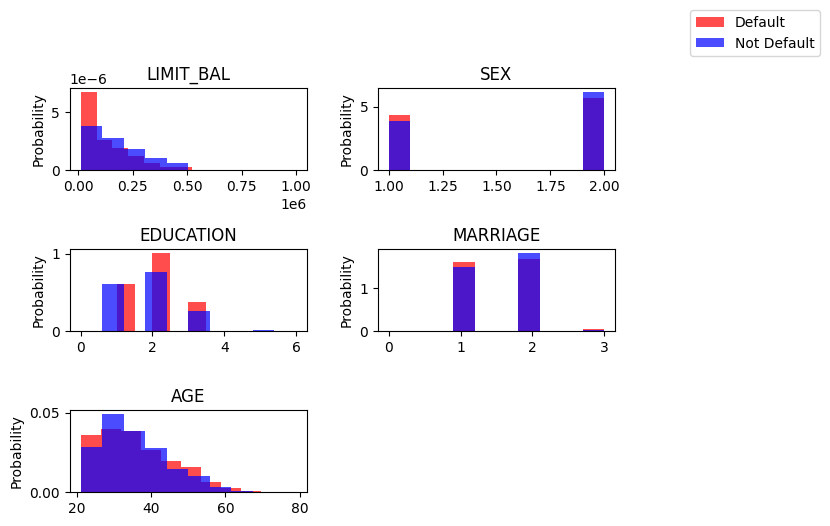

In [21]:
draw_histograms(df,client_background, 3,2,10)

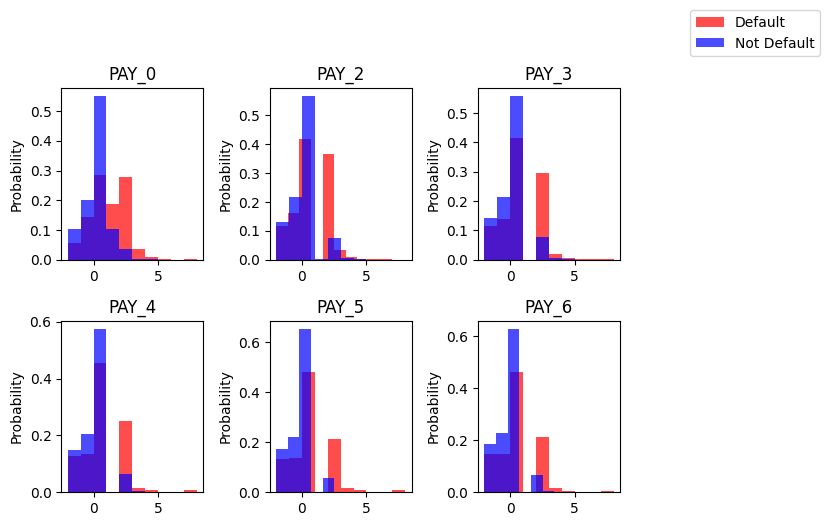

In [22]:
draw_histograms(df,pay, 2,3,10)

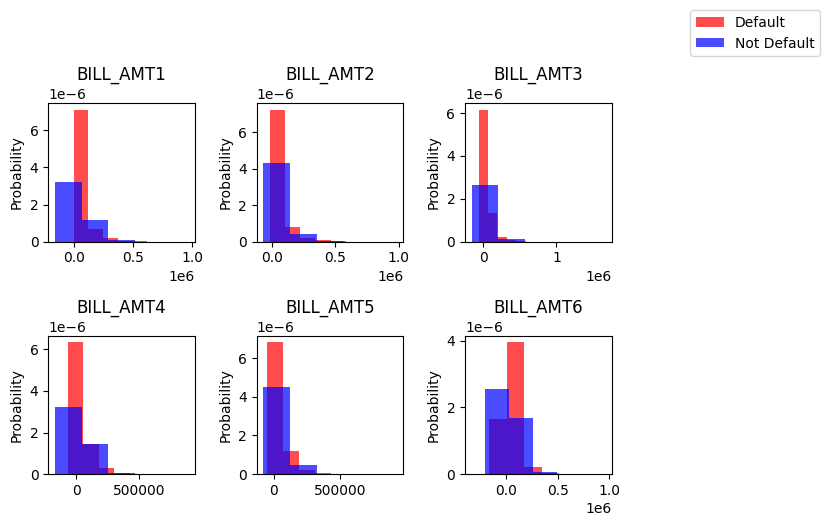

In [23]:
draw_histograms(df,bill_amt, 2,3,5)

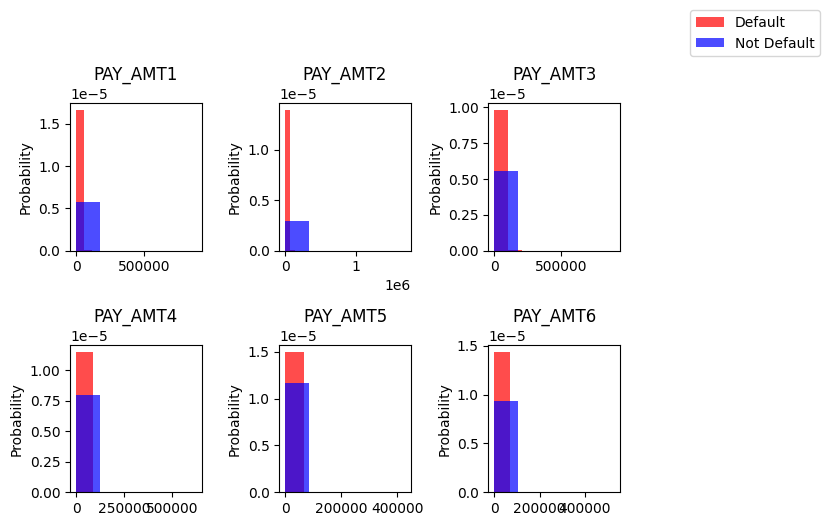

In [24]:
draw_histograms(df,pay_amt, 2,3,5)

Age is right-skewed

Clients who have delay payment in the latest month tends to have default payment next month.


## Correlation Analysis

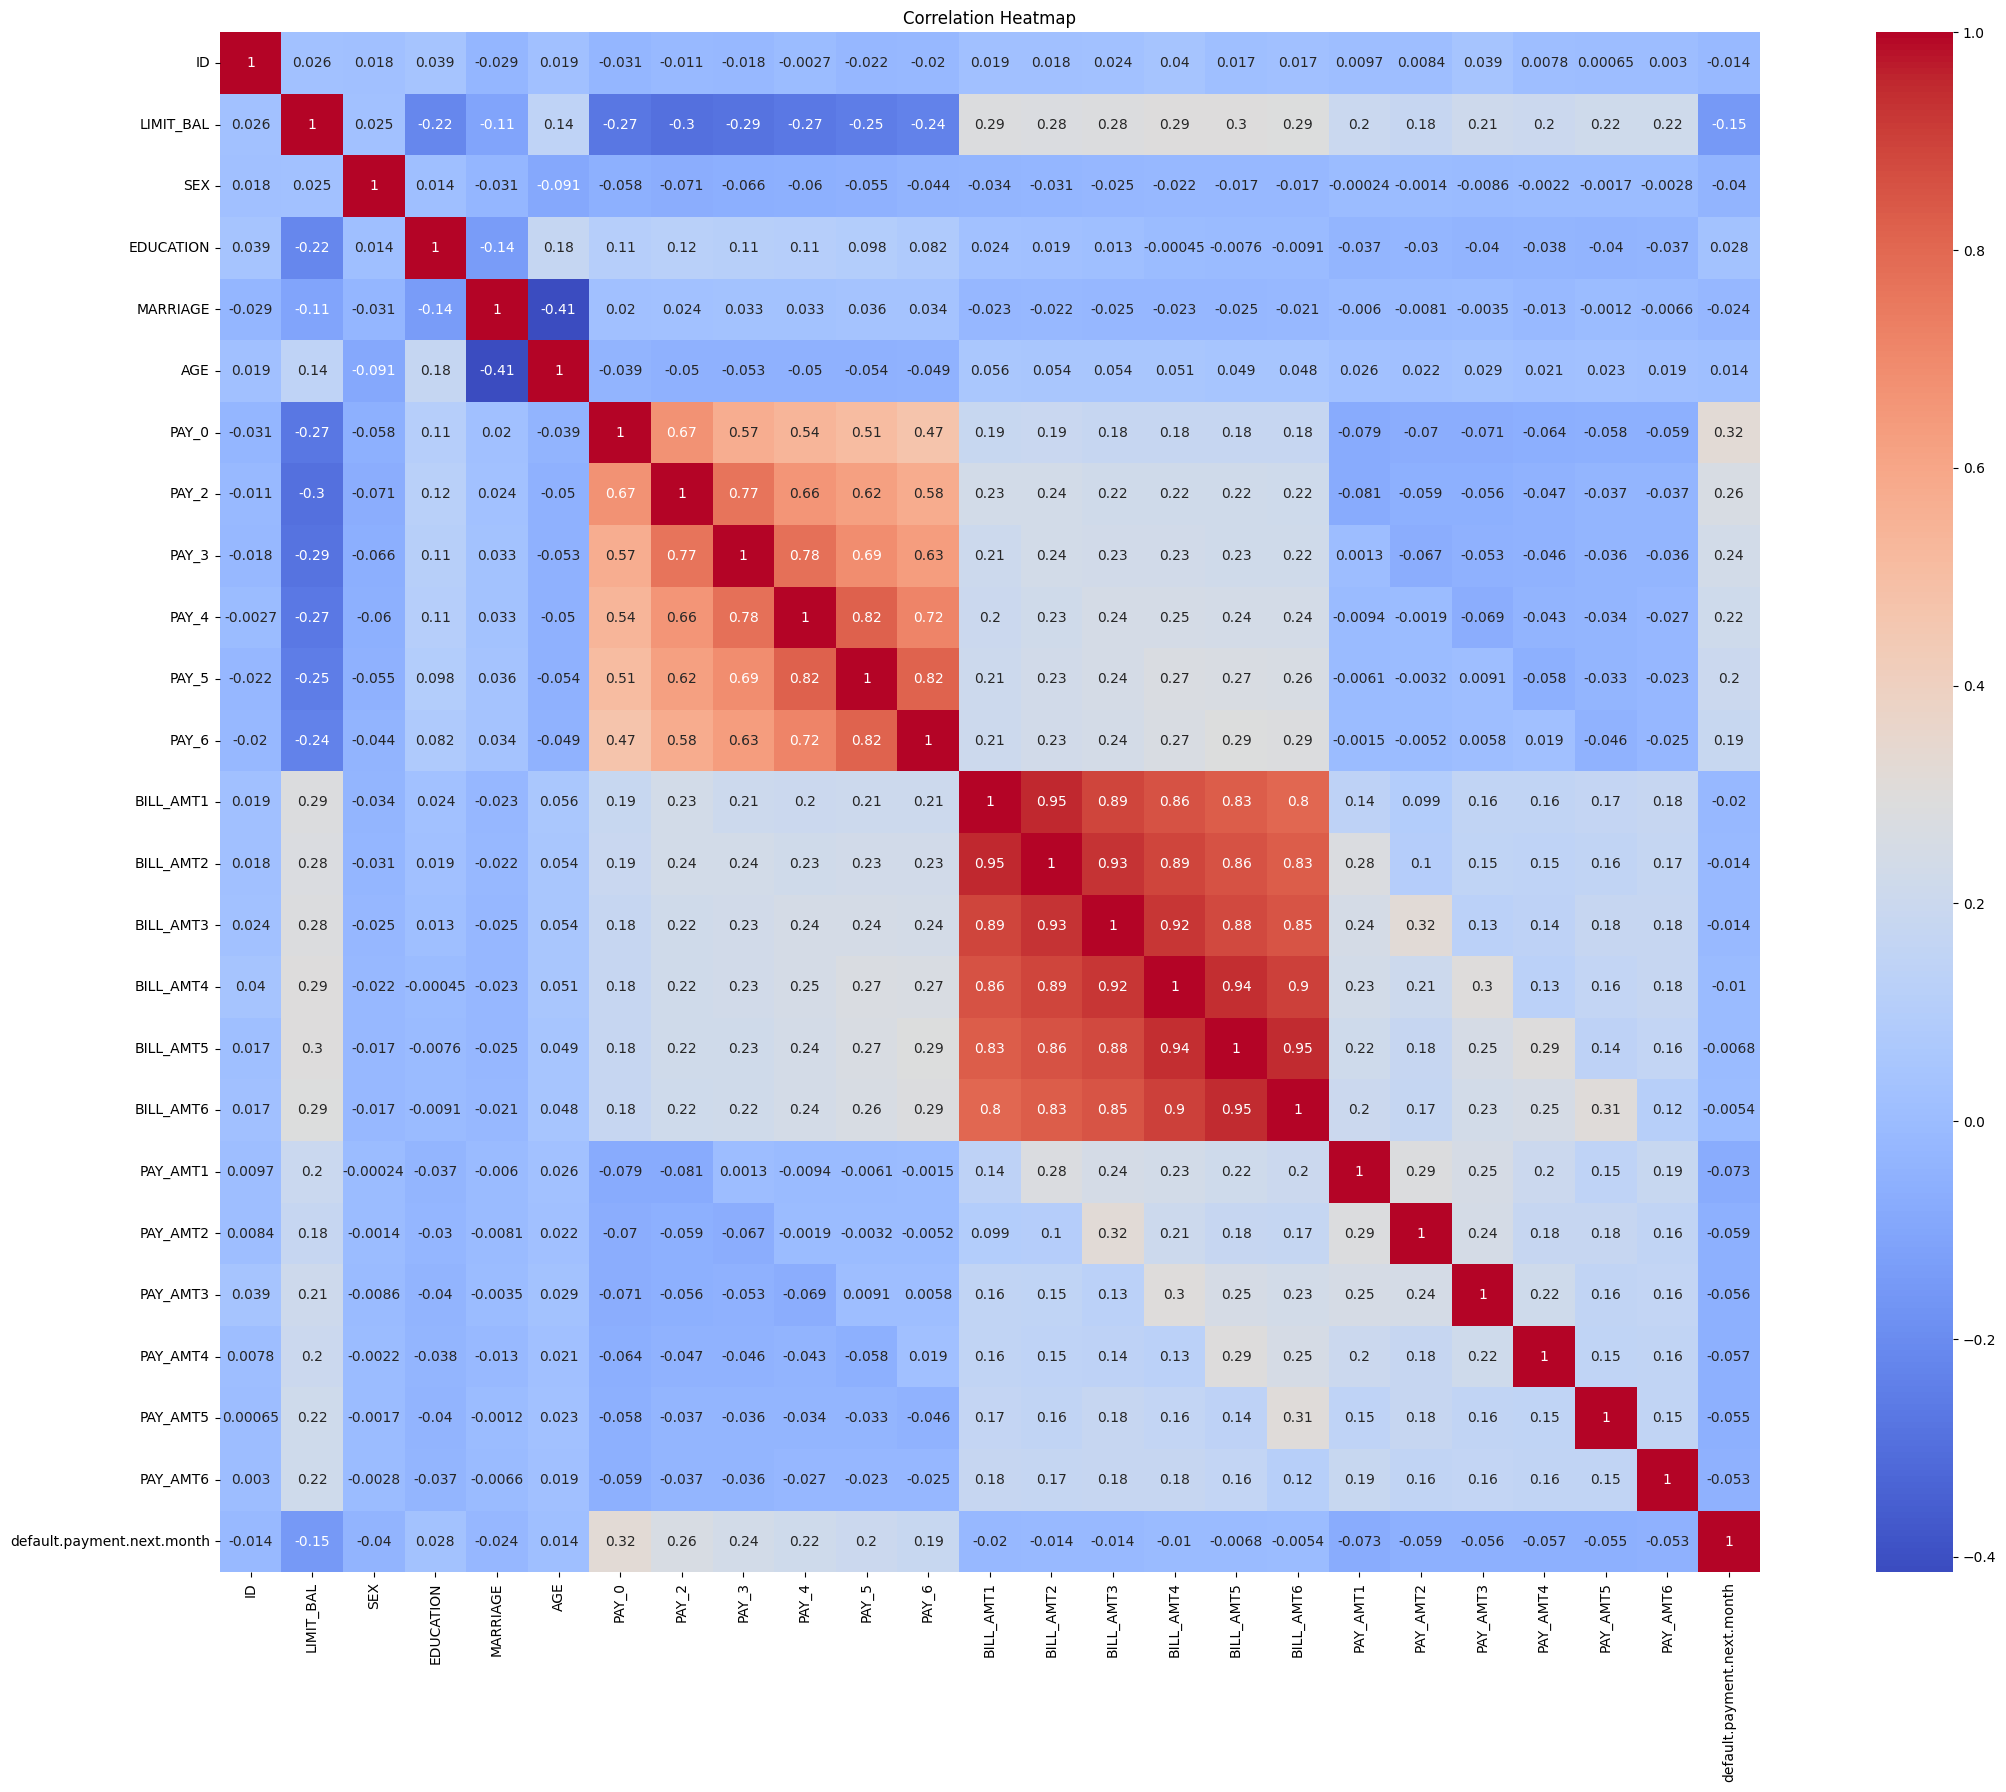

In [25]:
corr = np.corrcoef(df, rowvar=False)
plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, xticklabels=df.columns, yticklabels=df.columns)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# List out the top 30 positive correlation pairs of features
upper_tri = np.triu(corr, k=1) # Extract upper triangle of the correlation matrix
correlation_pairs = np.argwhere(upper_tri > 0) # Find indices of positive correlation pairs
sorted_pairs = sorted(correlation_pairs, key=lambda x: corr[x[0], x[1]], reverse=True) # Sort by correlation value
top_pairs = sorted_pairs[:30] # Select top 30 pairs

# Retrieve column names from dataframe
columns = df.columns

# Print out the top 30 positive correlation pairs of features with column names
print("Top 10 Positive Correlation Pairs of Features:")
for pair in top_pairs:
    feature1 = columns[pair[0]] # Retrieve column name for feature1
    feature2 = columns[pair[1]] # Retrieve column name for feature2
    correlation = corr[pair[0], pair[1]] # Retrieve correlation value
    print(f"Feature '{feature1}' and Feature '{feature2}': Correlation = {correlation:.3f}")

Top 10 Positive Correlation Pairs of Features:
Feature 'BILL_AMT1' and Feature 'BILL_AMT2': Correlation = 0.951
Feature 'BILL_AMT5' and Feature 'BILL_AMT6': Correlation = 0.946
Feature 'BILL_AMT4' and Feature 'BILL_AMT5': Correlation = 0.940
Feature 'BILL_AMT2' and Feature 'BILL_AMT3': Correlation = 0.928
Feature 'BILL_AMT3' and Feature 'BILL_AMT4': Correlation = 0.924
Feature 'BILL_AMT4' and Feature 'BILL_AMT6': Correlation = 0.901
Feature 'BILL_AMT2' and Feature 'BILL_AMT4': Correlation = 0.892
Feature 'BILL_AMT1' and Feature 'BILL_AMT3': Correlation = 0.892
Feature 'BILL_AMT3' and Feature 'BILL_AMT5': Correlation = 0.884
Feature 'BILL_AMT1' and Feature 'BILL_AMT4': Correlation = 0.860
Feature 'BILL_AMT2' and Feature 'BILL_AMT5': Correlation = 0.860
Feature 'BILL_AMT3' and Feature 'BILL_AMT6': Correlation = 0.853
Feature 'BILL_AMT2' and Feature 'BILL_AMT6': Correlation = 0.832
Feature 'BILL_AMT1' and Feature 'BILL_AMT5': Correlation = 0.830
Feature 'PAY_4' and Feature 'PAY_5': Correl

The variables within the "Amount of Bill Statement" (BILL_AMT) group exhibit high positive correlations, as do the variables within the "Repayment Statistics" (PAY) group. This may cause multiconlinearity when we run the model.


In [27]:
# Select the variables of interest (including the target variable)
pay.append('default.payment.next.month')
bill_amt.append('default.payment.next.month')


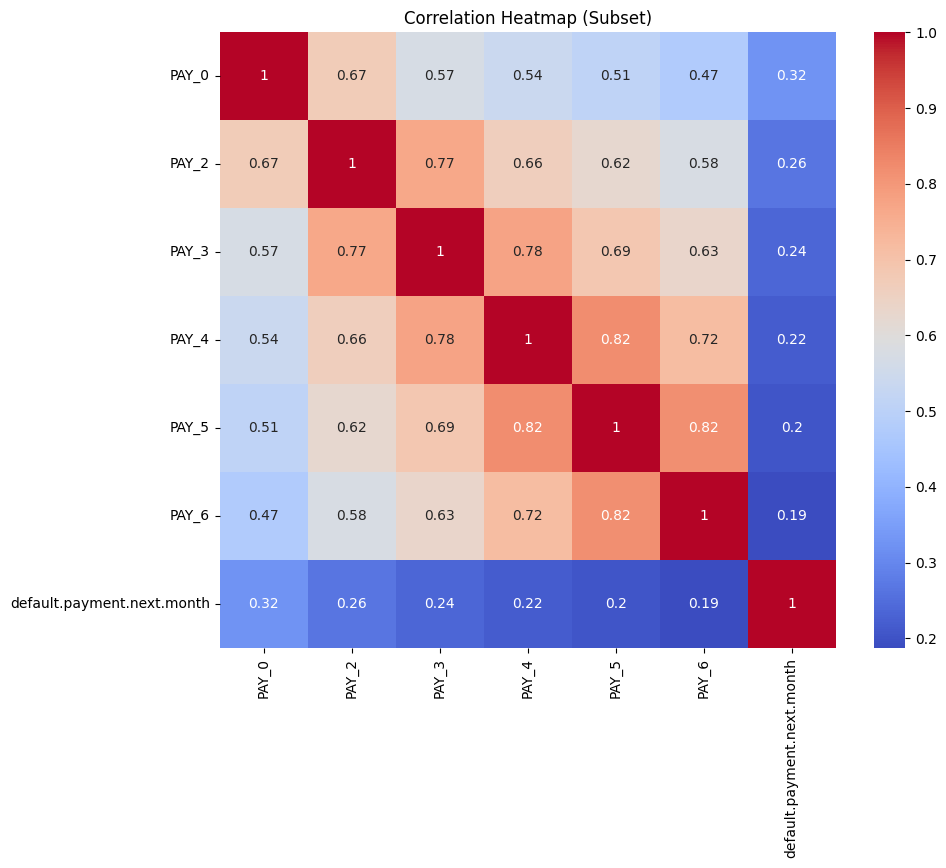

In [28]:
# Subset the correlation matrix to include only the selected variables
pay_subset = df[pay]

# Compute correlation matrix for the subset of variables
corr_subset = pay_subset.corr()

# Convert correlation matrix to 2-dimensional numpy array
corr_array = np.array(corr_subset)

# Create a heatmap of the correlation matrix for the subset of variables
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_array, annot=True, cmap="coolwarm", square=True, xticklabels=pay_subset.columns, yticklabels=pay_subset.columns)
plt.title("Correlation Heatmap (Subset)")
plt.show()

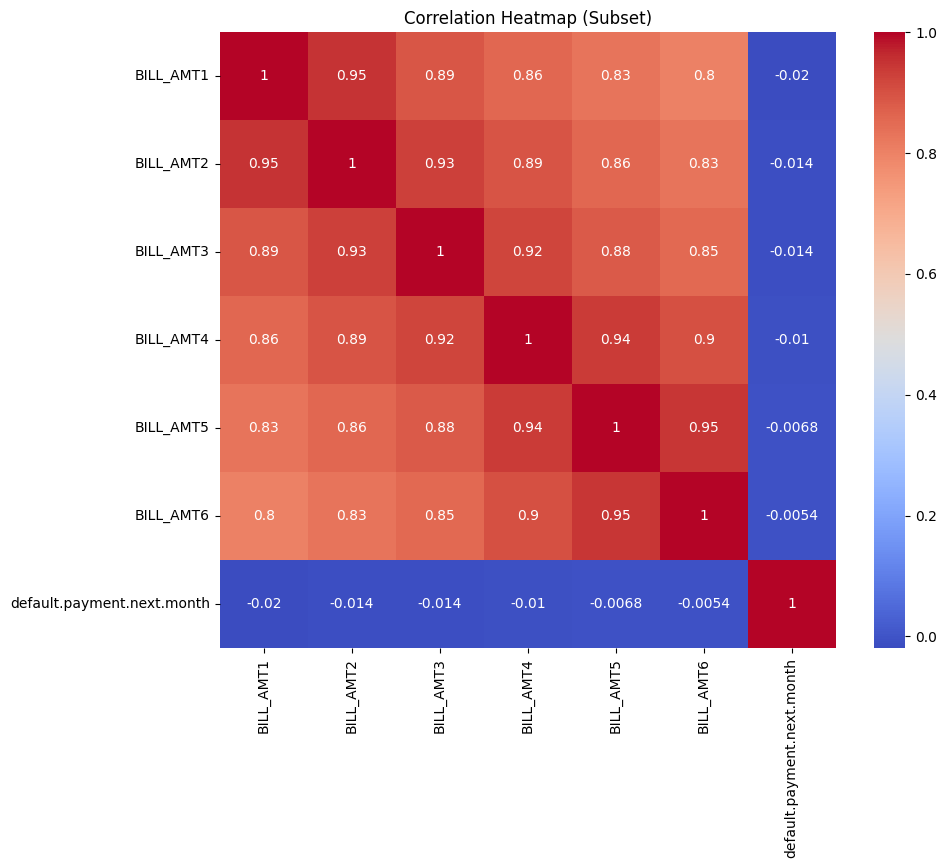

In [29]:
# Subset the correlation matrix to include only the selected variables
bill_amt_subset = df[bill_amt]

# Compute correlation matrix for the subset of variables
corr_subset = bill_amt_subset.corr()

# Convert correlation matrix to 2-dimensional numpy array
corr_array = np.array(corr_subset)

# Create a heatmap of the correlation matrix for the subset of variables
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_array, annot=True, cmap="coolwarm", square=True, xticklabels=bill_amt_subset.columns, yticklabels=bill_amt_subset.columns)
plt.title("Correlation Heatmap (Subset)")
plt.show()

We will first try the model with all features and later select the features with highest correlation with target variable

# Preprocessing

## Data Cleanning

In [30]:
# correct Pay_0 to Oay_1
df.rename(columns = {'PAY_0':'PAY_1'},inplace = True)

# drop ID which is not useful in modelling
df = df.drop(['ID'], axis =1)


## Feature Engineering

From EDA, we noted that there could be multicolinearity in Pay and Bill_Amt. Hence, we will only keep the highest variable in modelling

In [31]:
# drop high correlated features
df = df.drop(['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',], axis =1)

We will group the re-group the undefined data in EDUCATION and MARRIAGE to reduce number of groupings

In [32]:
# Education: group 5, 6, 0 under category 4
df['EDUCATION'] = np.where(df['EDUCATION'].isin([5, 6, 0]), 4, df['EDUCATION'])
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

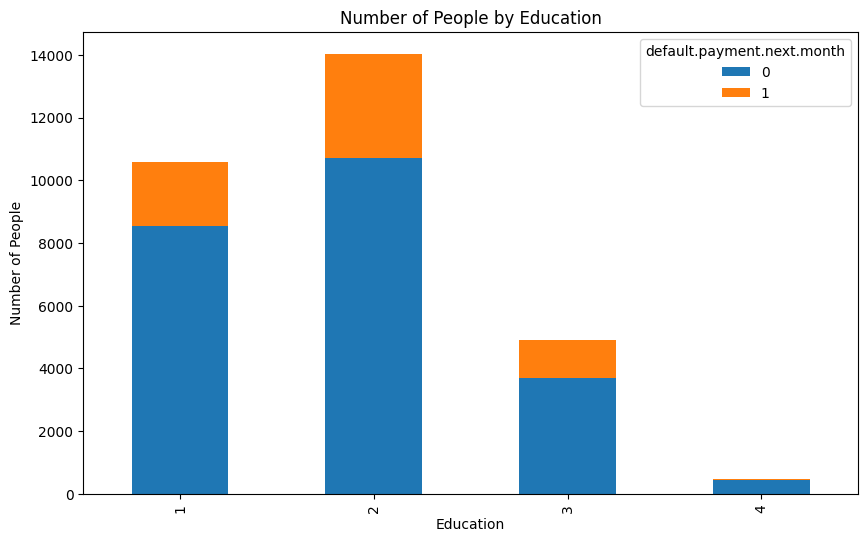

In [33]:
grouped_data = df.groupby(['EDUCATION', 'default.payment.next.month']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Education')
plt.ylabel('Number of People')
plt.title('Number of People by Education')
plt.show()

More people default for education level University and Graduate school

In [34]:
# Marriage: group 0 under category 3
df['MARRIAGE'] = np.where(df['MARRIAGE'].isin([0]), 3, df['MARRIAGE'])
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

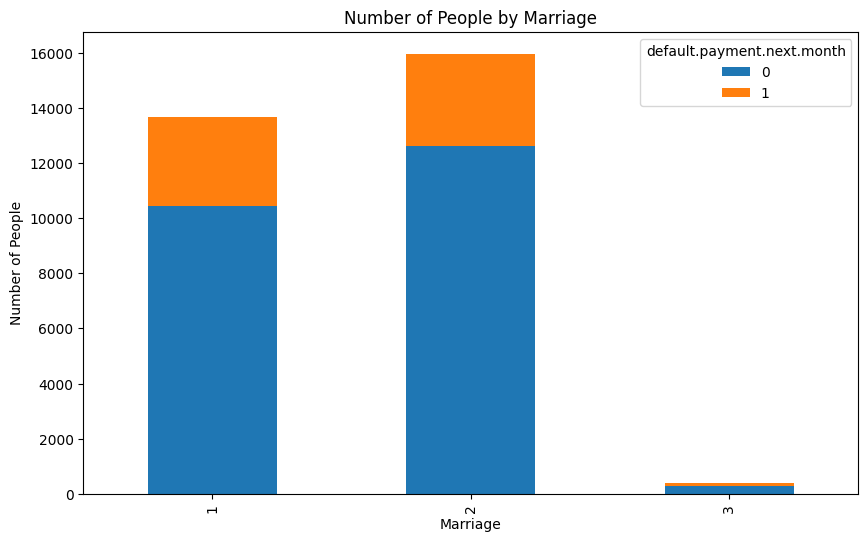

In [35]:
grouped_data = df.groupby(['MARRIAGE', 'default.payment.next.month']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Marriage')
plt.ylabel('Number of People')
plt.title('Number of People by Marriage')
plt.show()

Married and Single people show similar number of default rate

Then, we will create a new feature Age_range

In [36]:
age_bins = [18, 30, 40, 50, 60, 70, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '60+']
df['Age_range'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

In [37]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Age_range
0,20000.0,2,2,1,24,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1,18-29
1,120000.0,2,2,2,26,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,18-29
2,90000.0,2,2,2,34,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-39
3,50000.0,2,2,1,37,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30-39
4,50000.0,1,2,1,57,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50-59


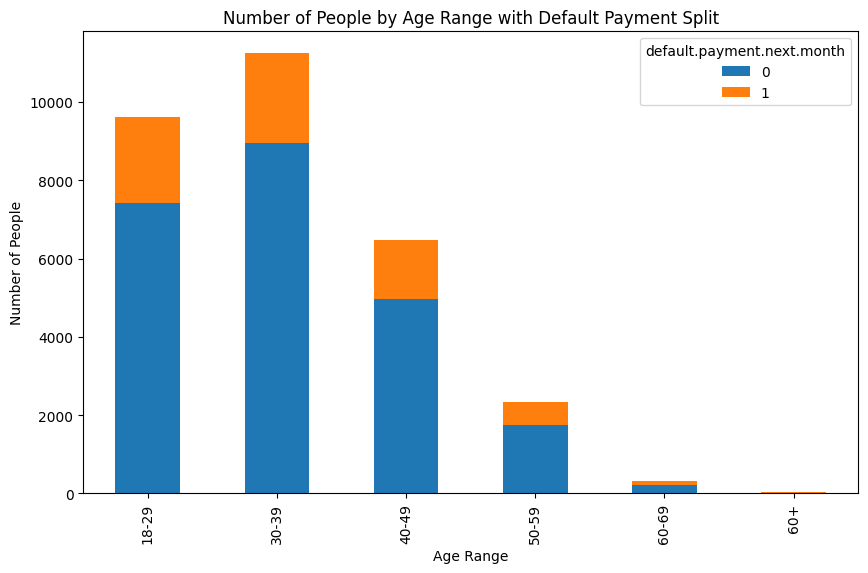

In [38]:
grouped_data = df.groupby(['Age_range', 'default.payment.next.month']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Number of People')
plt.title('Number of People by Age Range with Default Payment Split')
plt.show()

18-49 shows higher percentage of default payment among all age group

## One-Hot Encoding

In [39]:
# one-hot encoding for EDUCATION, MARRIAGE and Age_range
df_onehot = pd.get_dummies(df,columns=['EDUCATION','MARRIAGE','Age_range'])

In [40]:
# Encode Sex as 0 for women and 1 for men
df_onehot['SEX'] = np.where(df_onehot['SEX']==2, 0, df_onehot['SEX'])
df_onehot['SEX'].value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

In [41]:
# drop AGE, SEX
df_onehot = df_onehot.drop(['AGE','SEX'],axis=1)

In [42]:
df_onehot

,LIMIT_BAL,PAY_1,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,...,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,Age_range_18-29,Age_range_30-39,Age_range_40-49,Age_range_50-59,Age_range_60-69,Age_range_60+
0,20000.0,2,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,0,0,0
1,120000.0,-1,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,...,0,0,1,0,1,0,0,0,0,0
2,90000.0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,...,0,0,1,0,0,1,0,0,0,0
3,50000.0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,...,0,1,0,0,0,1,0,0,0,0
4,50000.0,-1,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0,188948.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,...,0,1,0,0,0,1,0,0,0,0
29996,150000.0,-1,1683.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,...,0,0,1,0,0,0,1,0,0,0
29997,30000.0,4,3565.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,...,0,0,1,0,0,1,0,0,0,0
29998,80000.0,1,-1645.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,...,0,1,0,0,0,0,1,0,0,0


# Train Test Split

To avoid data leakage, we will split the dataset before running preprocessing. Data will be partitioned into 60% training and 20% validation and 20% testing

In [43]:
y = df_onehot['default.payment.next.month']
X = df_onehot.drop(['default.payment.next.month'],axis =1)


In [44]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split the remaining train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)


print("Train set shapes: X_train={}, y_train={}".format(X_train.shape, y_train.shape))
print("Validation set shapes: X_val={}, y_val={}".format(X_val.shape, y_val.shape))
print("Test set shapes: X_test={}, y_test={}".format(X_test.shape, y_test.shape))

Train set shapes: X_train=(18000, 22), y_train=(18000,)
Validation set shapes: X_val=(6000, 22), y_val=(6000,)
Test set shapes: X_test=(6000, 22), y_test=(6000,)


In [45]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

14018
3982


We found that number of default is much smaller than non default. Hence, we will do oversampling

## Oversampling

In [46]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_test)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
# Oversample the data
ros = RandomOverSampler(sampling_strategy='minority') 
X_train, y_train = ros.fit_resample(X_train, y_train)

In [48]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

14018
14018


# Modelling

We will run below supervised learning model to test the accuracy:


*   Logistic Regression
*   kNN
*   Naive Bayes
*   SVC
*   Decision Tree
*   RandomForest
*   Neural Network







## Logistic Regression

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [51]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      4673
           1       0.36      0.63      0.46      1327

    accuracy                           0.67      6000
   macro avg       0.61      0.66      0.61      6000
weighted avg       0.75      0.67      0.70      6000



## kNN

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      4673
           1       0.33      0.58      0.42      1327

    accuracy                           0.65      6000
   macro avg       0.59      0.63      0.59      6000
weighted avg       0.74      0.65      0.68      6000



## Naive Bayes

In [54]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [55]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.19      0.31      4673
           1       0.25      0.93      0.39      1327

    accuracy                           0.35      6000
   macro avg       0.58      0.56      0.35      6000
weighted avg       0.76      0.35      0.33      6000



## Decision Tree

In [56]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4673
           1       0.39      0.41      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



## Random Forest

In [57]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model = rf_model.fit(X_train , y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4673
           1       0.59      0.42      0.49      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000



## Neural Network

In [58]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crosssentropy')
  ax1.grid(True)
  ax1.legend()

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()


  plt.show()

In [59]:
def create_nn_model(X_train, y_train, lr, epochs, batch_size):
  nn_model = keras.Sequential([
      layers.Dense(64, activation="relu"),      
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1, activation="sigmoid"),
  ])

  # Specify learning rate
  optimizer = RMSprop(learning_rate=lr)

  nn_model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_val, y_val),
  )
  return nn_model, history



In [60]:
nn_model, history = create_nn_model(X_train, y_train, 0.001, 20, 64)

Epoch 1/20
439/439 [==============================] - 3s 3ms/step - loss: 0.5913 - accuracy: 0.6826 - val_loss: 0.6747 - val_accuracy: 0.7223
Epoch 2/20
439/439 [==============================] - 1s 3ms/step - loss: 0.5688 - accuracy: 0.6962 - val_loss: 0.7663 - val_accuracy: 0.6398
Epoch 3/20
439/439 [==============================] - 1s 3ms/step - loss: 0.5592 - accuracy: 0.7022 - val_loss: 0.9197 - val_accuracy: 0.2997
Epoch 4/20
439/439 [==============================] - 1s 2ms/step - loss: 0.5512 - accuracy: 0.7070 - val_loss: 0.8778 - val_accuracy: 0.4258
Epoch 5/20
439/439 [==============================] - 1s 3ms/step - loss: 0.5446 - accuracy: 0.7145 - val_loss: 0.9098 - val_accuracy: 0.3703
Epoch 6/20
439/439 [==============================] - 1s 3ms/step - loss: 0.5395 - accuracy: 0.7172 - val_loss: 0.8330 - val_accuracy: 0.4835
Epoch 7/20
439/439 [==============================] - 1s 2ms/step - loss: 0.5338 - accuracy: 0.7207 - val_loss: 0.9209 - val_accuracy: 0.3600
Epoch 

In [61]:
results = nn_model.evaluate(X_test, y_test)

188/188 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7100


In [62]:
y_pred_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred_nn))

188/188 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      4673
           1       0.40      0.61      0.48      1327

    accuracy                           0.71      6000
   macro avg       0.63      0.67      0.64      6000
weighted avg       0.76      0.71      0.73      6000



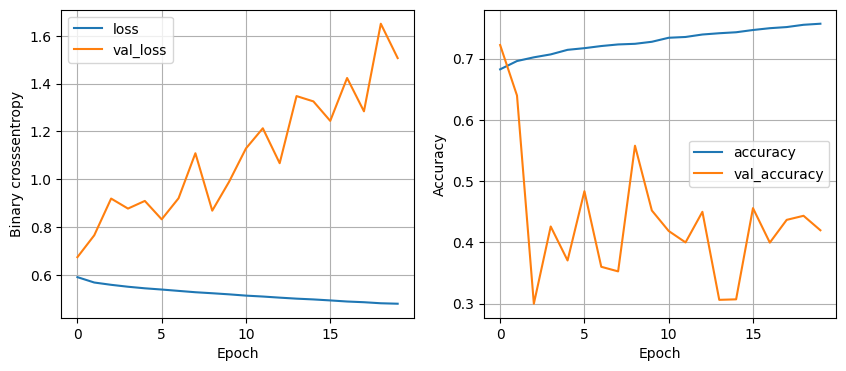

In [63]:
plot_history(history)

From chart, learning rate looks too large and the validation accuracy keeps bouncing

# Cross Validation

Stratified K-Fole Cross Validation without Neural Network

In [64]:
model_mean_accuracy=[]
model_std=[]

In [65]:


kfold = StratifiedKFold(n_splits=5, shuffle=True) 

classifiers=['Logistic Regression','KNN','Naive Bayes','Decision Tree','Random Forest']
models=[lg_model, knn_model, nb_model, dt_model, rf_model]

for i, model in zip(classifiers, models):
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    cv_result = cv_result
    model_mean_accuracy.append(cv_result.mean())
    model_std.append(cv_result.std())




Neural Network Stratified K-Fole Cross Validation

In [66]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores = []


for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    

    nn_model_kfold, history_kfold = create_nn_model(X_train, y_train, 0.001, 10, 64)
    
 
    y_pred_probs = nn_model_kfold.predict(X_test_fold, verbose=0)
    y_pred = (y_pred_probs > 0.5).astype(int) 
    

    accuracy = accuracy_score(y_test_fold, y_pred)
    print(f'accuracy: {accuracy}')
    accuracy_scores.append(accuracy)
    print(f'accuracy: {accuracy_scores}')

avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy: {:.2f}%".format(avg_accuracy * 100))

Epoch 1/10
439/439 [==============================] - 2s 3ms/step - loss: 0.5922 - accuracy: 0.6821 - val_loss: 0.8830 - val_accuracy: 0.5300
Epoch 2/10
439/439 [==============================] - 1s 2ms/step - loss: 0.5691 - accuracy: 0.6974 - val_loss: 0.8345 - val_accuracy: 0.5642
Epoch 3/10
439/439 [==============================] - 1s 2ms/step - loss: 0.5578 - accuracy: 0.7045 - val_loss: 0.7536 - val_accuracy: 0.6605
Epoch 4/10
439/439 [==============================] - 1s 2ms/step - loss: 0.5495 - accuracy: 0.7109 - val_loss: 0.8226 - val_accuracy: 0.5678
Epoch 5/10
439/439 [==============================] - 1s 2ms/step - loss: 0.5435 - accuracy: 0.7125 - val_loss: 0.7184 - val_accuracy: 0.6528
Epoch 6/10
439/439 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.7142 - val_loss: 0.9235 - val_accuracy: 0.5793
Epoch 7/10
439/439 [==============================] - 1s 2ms/step - loss: 0.5319 - accuracy: 0.7183 - val_loss: 0.7726 - val_accuracy: 0.6987
Epoch 

Append the result for Stratified K-Fole Cross Validation

In [67]:

avg_accuracy_nn = np.mean(accuracy_scores)
std_accuracy_nn = np.std(accuracy_scores)

In [68]:
model_mean_accuracy.append(avg_accuracy_nn)
model_std.append(std_accuracy_nn)
classifiers.append('Neural Network')

In [69]:
stratified_k_fold_performance = pd.DataFrame({'Mean Accuracy': model_mean_accuracy, 'Std': model_std}, index=classifiers)
print(stratified_k_fold_performance)

                     Mean Accuracy       Std
Logistic Regression       0.778800  0.000067
KNN                       0.751367  0.004654
Naive Bayes               0.363467  0.008020
Decision Tree             0.720833  0.003607
Random Forest             0.816800  0.005519
Neural Network            0.770000  0.016505


# Model Selection and Hyperparameter tunning

We will further find fine-tune the hyperparameter of Random Forest and Neural Network to see if we can achieve higher accuracy

### Tunning Hyper Parameter

Manual Tunning hyper parameter of neural network.


*   Increase number of layers
*   Add dropout layers
*   reduce learning rate
*   increase batch size





In [70]:
def create_nn_model_manualtune(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model_manualtune = keras.Sequential([
      layers.Dense(num_nodes, activation="relu"),
      layers.Dropout(dropout_prob),      
      layers.Dense(num_nodes, activation="relu"),
      layers.Dropout(dropout_prob),
      layers.Dense(num_nodes, activation="relu"),
      layers.Dropout(dropout_prob),
      layers.Dense(num_nodes, activation="relu"),
      layers.Dropout(dropout_prob),
      layers.Dense(1, activation="sigmoid"),
  ])


  optimizer = RMSprop(learning_rate=lr)

  nn_model_manualtune.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_split=0.2,
  )
  return nn_model_manualtune, history


In [71]:
nn_model_manualtune, history = create_nn_model_manualtune (X_train, y_train, 16, 0.2, 0.0001, 128, 30)

Epoch 1/30
176/176 [==============================] - 1s 3ms/step - loss: 0.4572 - accuracy: 0.7731 - val_loss: 0.5885 - val_accuracy: 0.6544
Epoch 2/30
176/176 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.7775 - val_loss: 0.6574 - val_accuracy: 0.6207
Epoch 3/30
176/176 [==============================] - 1s 3ms/step - loss: 0.4489 - accuracy: 0.7779 - val_loss: 0.6090 - val_accuracy: 0.6412
Epoch 4/30
176/176 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.7810 - val_loss: 0.7932 - val_accuracy: 0.5688
Epoch 5/30
176/176 [==============================] - 1s 3ms/step - loss: 0.4434 - accuracy: 0.7821 - val_loss: 0.6944 - val_accuracy: 0.5843
Epoch 6/30
176/176 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.7837 - val_loss: 0.5812 - val_accuracy: 0.6723
Epoch 7/30
176/176 [==============================] - 1s 3ms/step - loss: 0.4379 - accuracy: 0.7839 - val_loss: 0.6433 - val_accuracy: 0.6214
Epoch 

In [72]:
results = nn_model_manualtune.evaluate(X_test, y_test)

188/188 [==============================] - 1s 1ms/step - loss: 0.6880 - accuracy: 0.5095


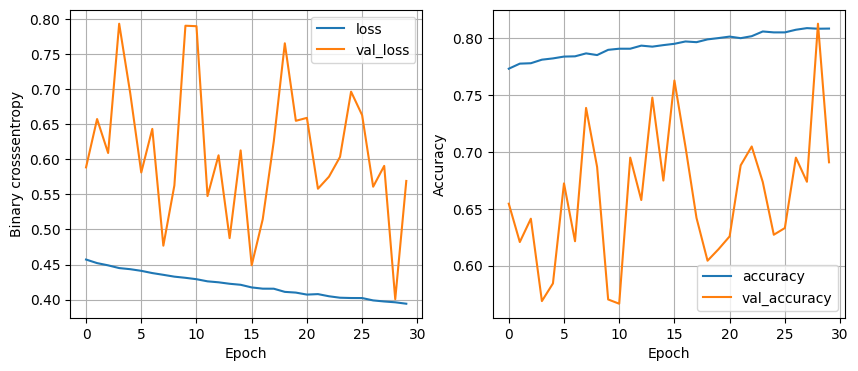

In [73]:
plot_history(history)

In [74]:
nn_model_manualtune.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                368       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_33 (Dense)            (None, 16)               

In [75]:
y_pred_nn_manualtune = nn_model_manualtune.predict(X_test)
y_pred_nn_manualtune = (y_pred_nn_manualtune > 0.5).astype(int).reshape(-1,)

188/188 [==============================] - 0s 1ms/step


In [76]:
print(classification_report(y_val, y_pred_nn_manualtune))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      4673
           1       0.23      0.45      0.30      1327

    accuracy                           0.54      6000
   macro avg       0.50      0.51      0.48      6000
weighted avg       0.66      0.54      0.58      6000



The accuracy is worse than previously. Let's try using Kera Tuner

### Kera Tuner

In [77]:
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of layers.
    for i in range(hp.Int('num_layers', 2, 10)):                # hidden layer
        model.add(
            layers.Dense(
                units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=64,
                                            step=32),
                               activation='relu'
                               )
            )
        if hp.Boolean("dropout"):
            model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation='sigmoid'))            # output layer
    learning_rate = hp.Float("lr", min_value=1e-5, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )
    return model
build_model(kt.HyperParameters())

In [78]:
tuner = kt.RandomSearch(
    hypermodel = build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    overwrite=True,
    directory='project',
    project_name='Credit Card Default'
    )

In [79]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

Trial 5 Complete [00h 00m 47s]
val_accuracy: 0.6891666650772095

Best val_accuracy So Far: 0.7550555467605591
Total elapsed time: 00h 04m 22s


### Retrain the model

In [80]:
# Get the top 5 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
nn_model_keratuner = build_model(best_hps[0])
# Fit with the entire dataset.
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))
nn_model_keratuner.fit(x=x_all, y=y_all, epochs=1)

1064/1064 [==============================] - 6s 3ms/step - loss: 0.6850 - accuracy: 0.5484


In [81]:
nn_model_keratuner.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                368       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 48)                816       
                                                                 
 dropout_2 (Dropout)         (None, 48)                0         
                                                                 
 dense_7 (Dense)             (None, 16)               

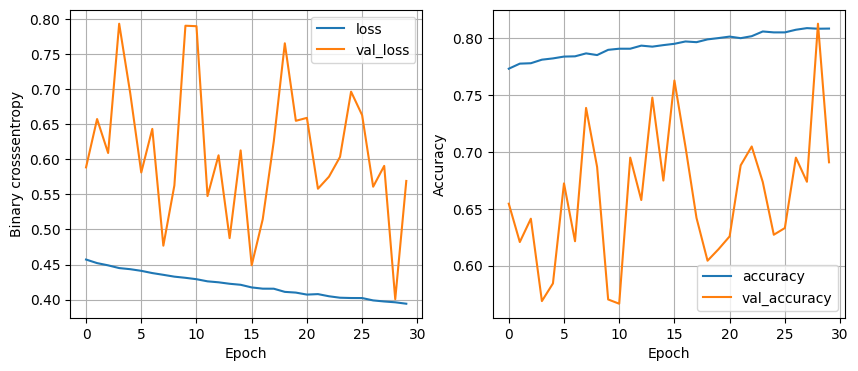

In [82]:
plot_history(history)

In [83]:
y_pred_nn_keratuner = nn_model_keratuner.predict(X_test)
y_pred_nn_keratuner = (y_pred_nn_keratuner > 0.5).astype(int).reshape(-1,)

188/188 [==============================] - 0s 1ms/step


In [84]:
print(classification_report(y_test, y_pred_nn_keratuner))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4673
           1       0.00      0.00      0.00      1327

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## GridSeach CV

In [85]:

param_grid = {
    'n_estimators': [10, 30],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 6],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the Random Forest Classifier
rf_model_gs = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model_gs, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      4673
           1       0.57      0.41      0.48      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.78      0.80      0.79      6000



            Feature  Importance
1             PAY_1    0.166260
2         BILL_AMT1    0.113935
0         LIMIT_BAL    0.100705
4          PAY_AMT2    0.094302
3          PAY_AMT1    0.092181
5          PAY_AMT3    0.087860
6          PAY_AMT4    0.081490
7          PAY_AMT5    0.080604
8          PAY_AMT6    0.078229
17  Age_range_30-39    0.012819
10      EDUCATION_2    0.011464
13       MARRIAGE_1    0.011208
16  Age_range_18-29    0.011168
18  Age_range_40-49    0.011065
9       EDUCATION_1    0.010826
14       MARRIAGE_2    0.010687
11      EDUCATION_3    0.009405
19  Age_range_50-59    0.007355
12      EDUCATION_4    0.003255
20  Age_range_60-69    0.002502
15       MARRIAGE_3    0.002405
21    Age_range_60+    0.000275


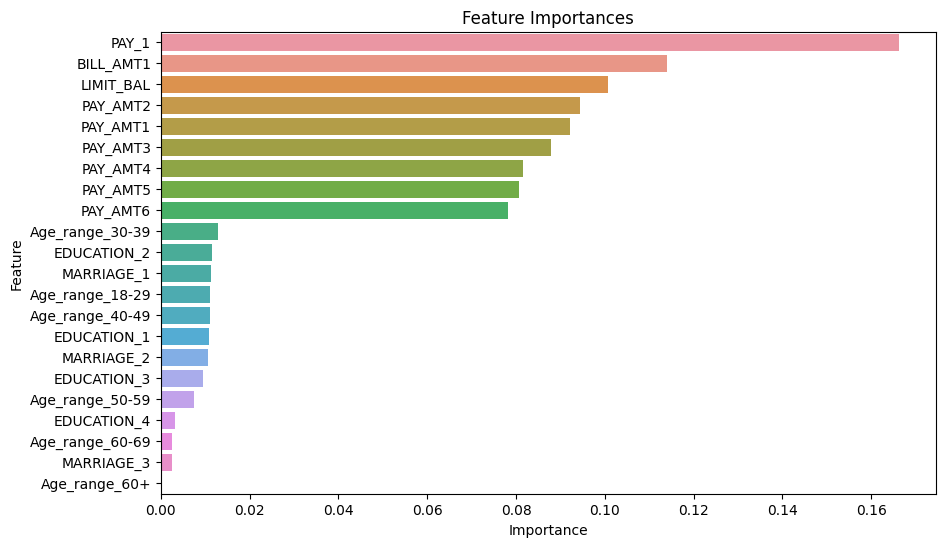

In [86]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Convert X_train to a DataFrame with original feature names
X_train_df = pd.DataFrame(X_train, columns=list(X.columns))


importances_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Business Implication

Based on the analysis, it has been determined that the Random Forecast algorithm exhibits the highest performance, with an accuracy of 80%. Additionally, the feature importances chart has revealed that the repayment status in September (PAY_1) has the most significant impact on the target variable. Following PAY_1, the second highest influential feature is the amount of bill statement (BAIL_AMT1) in September, with the amount of given credit (LIMIT_BAL) ranking third. As a recommendation, the company should prioritize monitoring the repayment status and bill statement amount in the latest month, as well as the amount of credit extended to borrowers.